In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
claims_df = pd.read_csv('../data/processed/dim_claims_train.csv').fillna(0)
date_df = pd.read_csv('../data/processed/dim_date_train.csv', parse_dates=[1])
bridge_df = pd.read_csv('../data/processed/bridge_train.csv')

# Claim Volume
## How does the total claim volume change with time?
- There is a clear yearly trend with an increase in claims at the new year.
- There is a monthly trend with claims decreasing throughout a single year along with correlations with each month (e.g. March and August has a higher percentage of the claims, while June and September have a lower percentage of claims)
- There is a clear weekly trend with fewer claims on the weekend. There are also weekly dips at the end of May (Memorial Day?), beginning of July (Independence Day?), and in September (school year starting?).

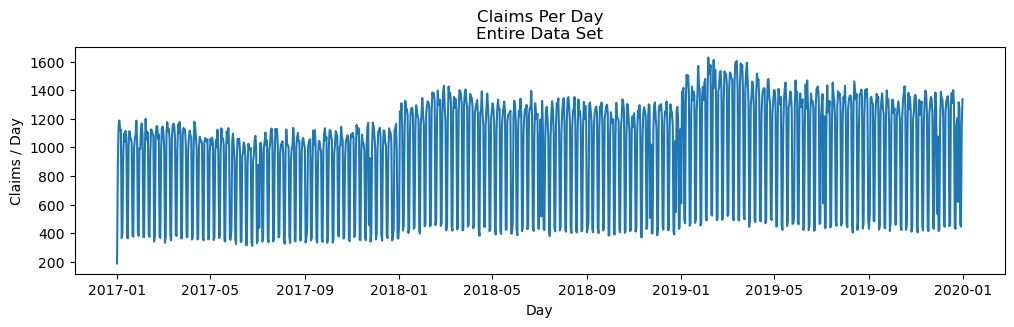

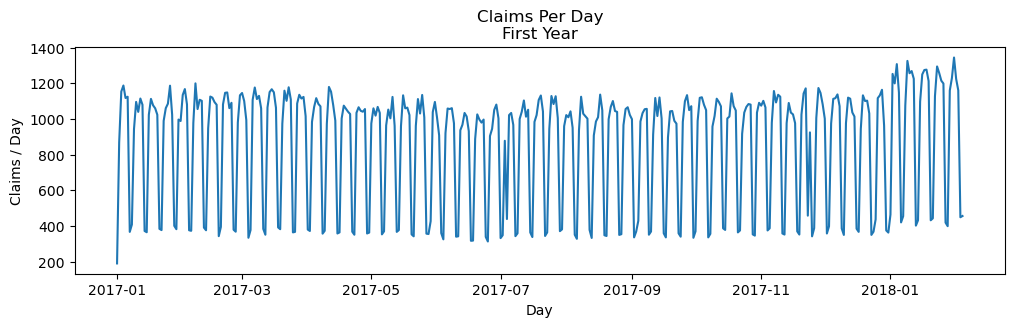

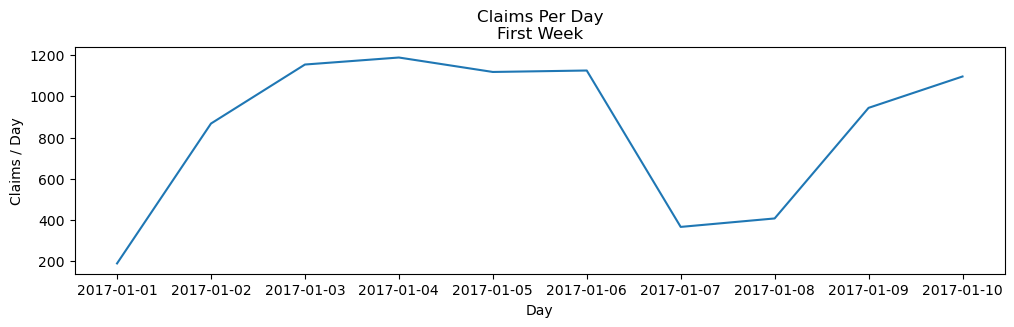

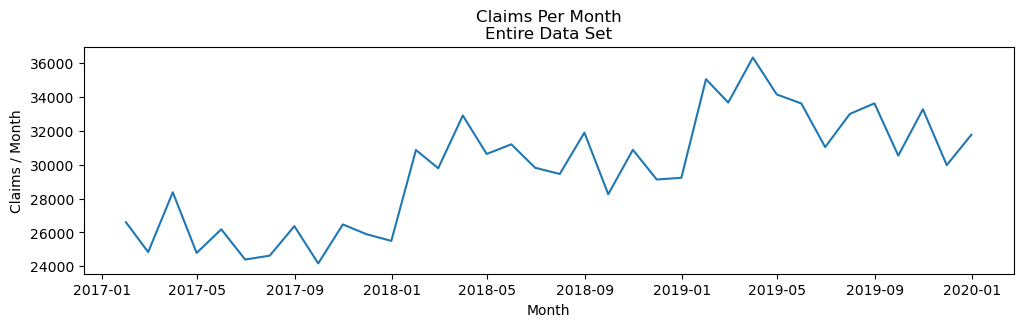

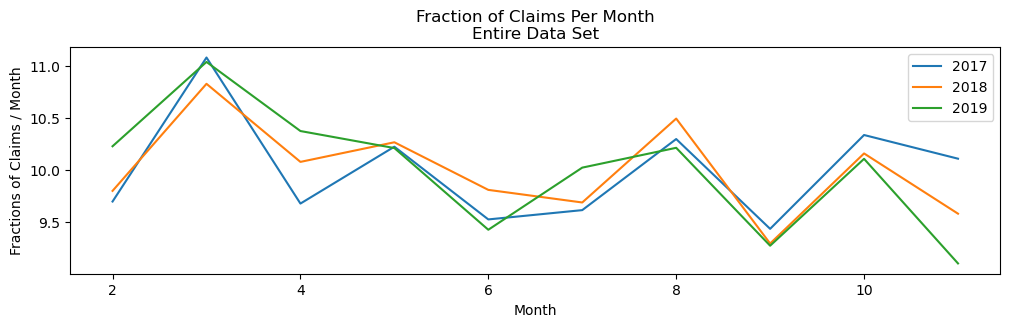

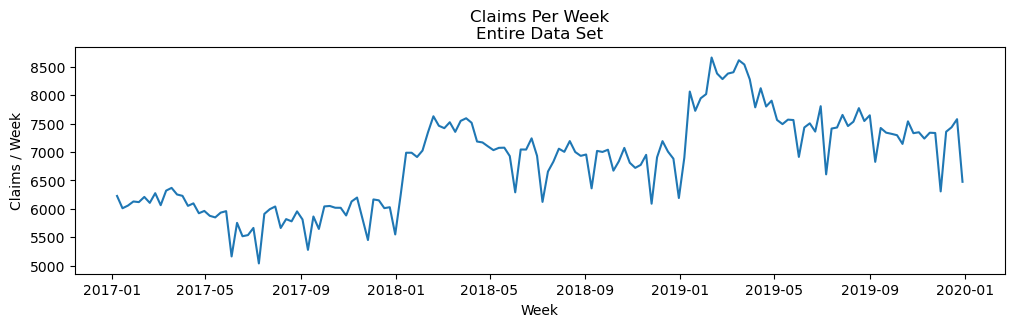

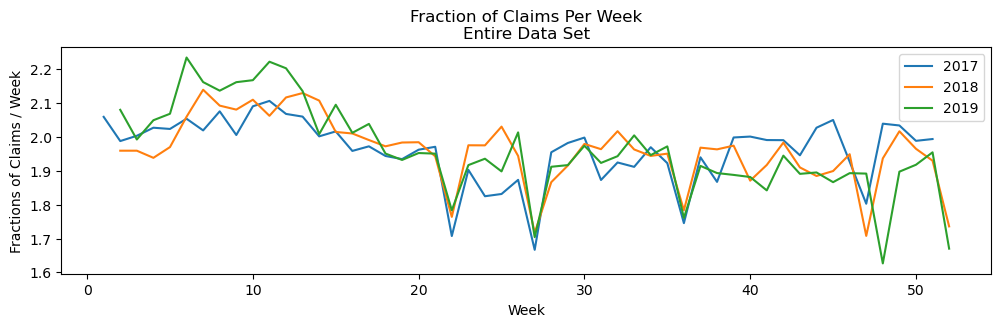

In [3]:
merged = bridge_df.merge(claims_df, on='dim_claim_id').merge(date_df, on='dim_date_id')
f, axes = plt.subplots(1, 1, figsize=(12, 3), dpi=100)
plt.title('Claims Per Day\nEntire Data Set')
plt.plot(merged.groupby('date_val')['pharmacy_claim_approved'].count())
plt.ylabel('Claims / Day')
plt.xlabel('Day')
plt.show()

f, axes = plt.subplots(1, 1, figsize=(12, 3), dpi=100)
plt.title('Claims Per Day\nFirst Year')
plt.plot(merged.groupby('date_val')['pharmacy_claim_approved'].count().iloc[:400])
plt.ylabel('Claims / Day')
plt.xlabel('Day')
plt.show()

f, axes = plt.subplots(1, 1, figsize=(12, 3), dpi=100)
plt.title('Claims Per Day\nFirst Week')
plt.plot(merged.groupby('date_val')['pharmacy_claim_approved'].count().iloc[:10])
plt.ylabel('Claims / Day')
plt.xlabel('Day')
plt.show()

f, axes = plt.subplots(1, 1, figsize=(12, 3), dpi=100)
plt.title('Claims Per Month\nEntire Data Set')
plt.plot(merged.groupby('date_val').count().groupby(pd.Grouper(freq='M'))['pharmacy_claim_approved'].sum())
plt.ylabel('Claims / Month')
plt.xlabel('Month')
plt.show()

f, axes = plt.subplots(1, 1, figsize=(12, 3), dpi=100)
for year, view in merged.groupby('calendar_year'):
    view = view.groupby('date_val').count().groupby(pd.Grouper(freq='M'))['pharmacy_claim_approved'].sum()[1:-1]
    view = view / view.sum() * 100

    plt.title('Fraction of Claims Per Month\nEntire Data Set')
    plt.plot(np.array(view.index.month).astype(int), view.values, label=year)
    plt.ylabel('Fractions of Claims / Month')
    plt.xlabel('Month')
plt.legend()
plt.show()

f, axes = plt.subplots(1, 1, figsize=(12, 3), dpi=100)
plt.title('Claims Per Week\nEntire Data Set')
# need to truncate the first and last bins because the weeks are incomplete
plt.plot(merged.groupby('date_val').count().groupby(pd.Grouper(freq='W'))['pharmacy_claim_approved'].sum()[1:-1])
plt.ylabel('Claims / Week')
plt.xlabel('Week')
plt.show()

f, axes = plt.subplots(1, 1, figsize=(12, 3), dpi=100)
for year, view in merged.groupby('calendar_year'):
    # need to truncate the first and last bins because the weeks can be incomplete
    view = view.groupby('date_val').count().groupby(pd.Grouper(freq='W'))['pharmacy_claim_approved'].sum()[1:-1]
    view = view / view.sum() * 100

    plt.title('Fraction of Claims Per Week\nEntire Data Set')
    plt.plot(np.array(view.index.isocalendar().week).astype(int), view.values, label=year)
    plt.ylabel('Fractions of Claims / Week')
    plt.xlabel('Week')
plt.legend()
plt.show()

## How does the claim volume change with time for each drug?
- Drug A accounts for the majority of the claims at most times.
- Drug A at the end of 2017 had an increase in claims while the other two drugs had a decrease.

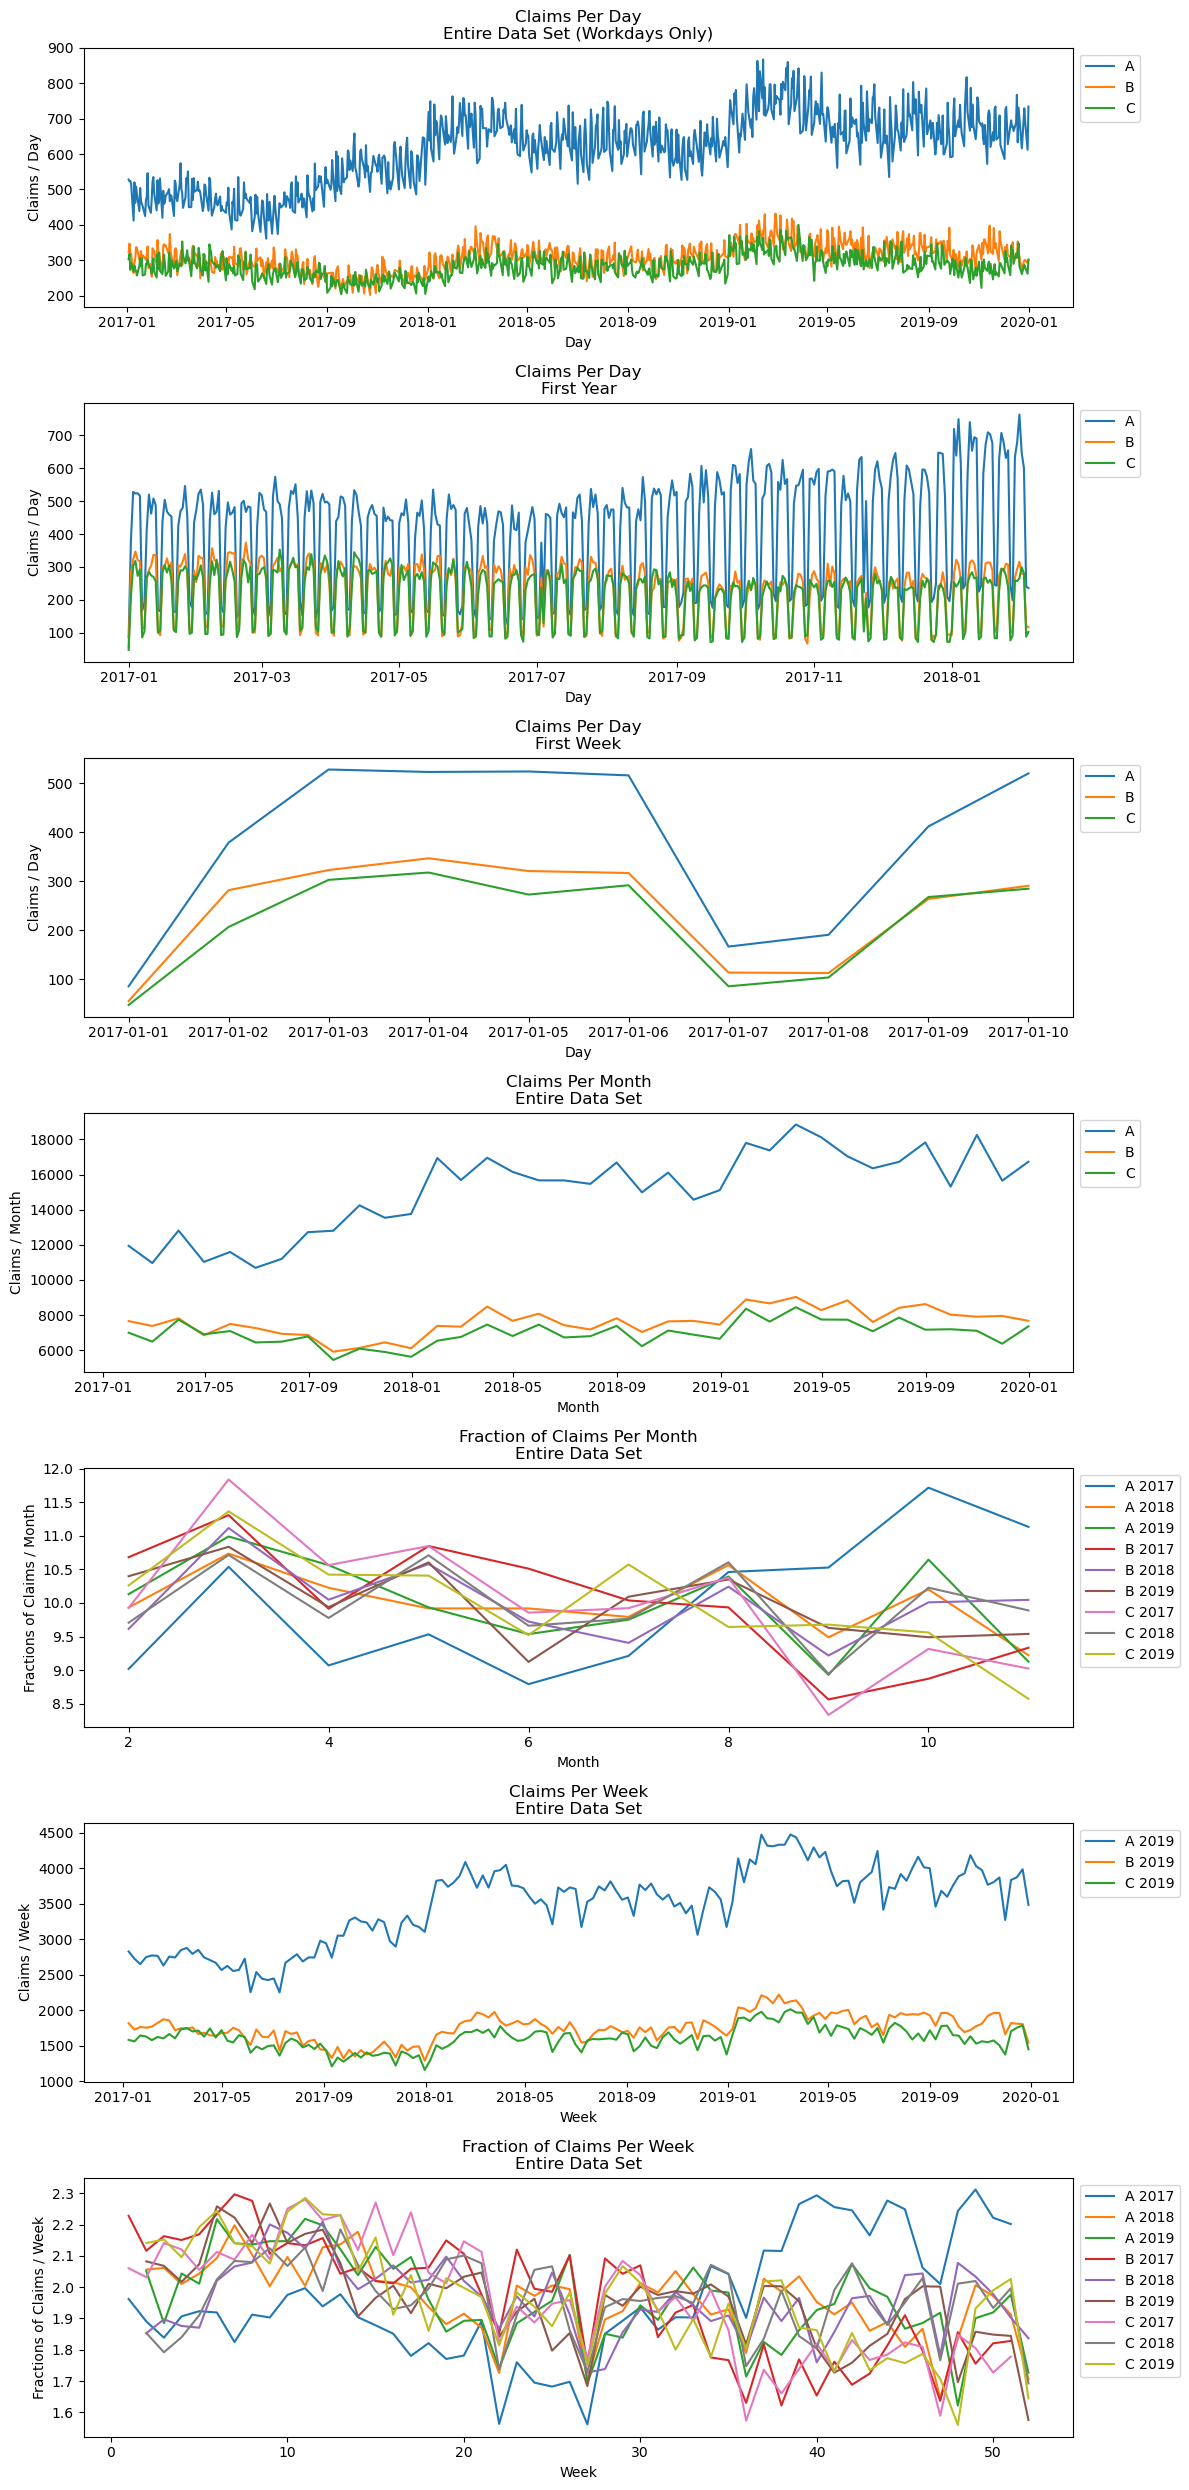

In [4]:
f, axes = plt.subplots(7, 1, figsize=(12, 25), dpi=100)
merged = bridge_df.merge(claims_df, on='dim_claim_id').merge(date_df, on='dim_date_id')

for drug in merged['drug'].unique():
    segment = merged.loc[merged['drug'] == drug]
    axes[0].set_title('Claims Per Day\nEntire Data Set (Workdays Only)')
    axes[0].plot(segment.loc[segment['is_workday'] == 1].groupby('date_val')['pharmacy_claim_approved'].count(), label=drug)
    axes[0].set_ylabel('Claims / Day')
    axes[0].set_xlabel('Day')

    axes[1].set_title('Claims Per Day\nFirst Year')
    axes[1].plot(segment.groupby('date_val')['pharmacy_claim_approved'].count().iloc[:400], label=drug)
    axes[1].set_ylabel('Claims / Day')
    axes[1].set_xlabel('Day')

    axes[2].set_title('Claims Per Day\nFirst Week')
    axes[2].plot(segment.groupby('date_val')['pharmacy_claim_approved'].count().iloc[:10], label=drug)
    axes[2].set_ylabel('Claims / Day')
    axes[2].set_xlabel('Day')

    axes[3].set_title('Claims Per Month\nEntire Data Set')
    axes[3].plot(segment.groupby('date_val').count().groupby(pd.Grouper(freq='M'))['pharmacy_claim_approved'].sum(), label=drug)
    axes[3].set_ylabel('Claims / Month')
    axes[3].set_xlabel('Month')

    for year, view in segment.groupby('calendar_year'):
        view = view.groupby('date_val').count().groupby(pd.Grouper(freq='M'))['pharmacy_claim_approved'].sum()[1:-1]
        view = view / view.sum() * 100

        axes[4].set_title('Fraction of Claims Per Month\nEntire Data Set')
        axes[4].plot(np.array(view.index.month).astype(int), view.values, label=drug + ' ' + str(year))
        axes[4].set_ylabel('Fractions of Claims / Month')
        axes[4].set_xlabel('Month')

    axes[5].set_title('Claims Per Week\nEntire Data Set')
    # need to truncate the first and last bins because the weeks are incomplete
    axes[5].plot(segment.groupby('date_val').count().groupby(pd.Grouper(freq='W'))['pharmacy_claim_approved'].sum()[1:-1], label=drug + ' ' + str(year))
    axes[5].set_ylabel('Claims / Week')
    axes[5].set_xlabel('Week')

    for year, view in segment.groupby('calendar_year'):
        # need to truncate the first and last bins because the weeks can be incomplete
        view = view.groupby('date_val').count().groupby(pd.Grouper(freq='W'))['pharmacy_claim_approved'].sum()[1:-1]
        view = view / view.sum() * 100

        axes[6].set_title('Fraction of Claims Per Week\nEntire Data Set')
        axes[6].plot(np.array(view.index.isocalendar().week).astype(int), view.values, label=drug + ' ' + str(year))
        axes[6].set_ylabel('Fractions of Claims / Week')
        axes[6].set_xlabel('Week')

for ax in axes:
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## How does the claim volume change with time for each payer?
- Payer 999001 accounts for the majority of claims at each time.
- Monthly trends remain.

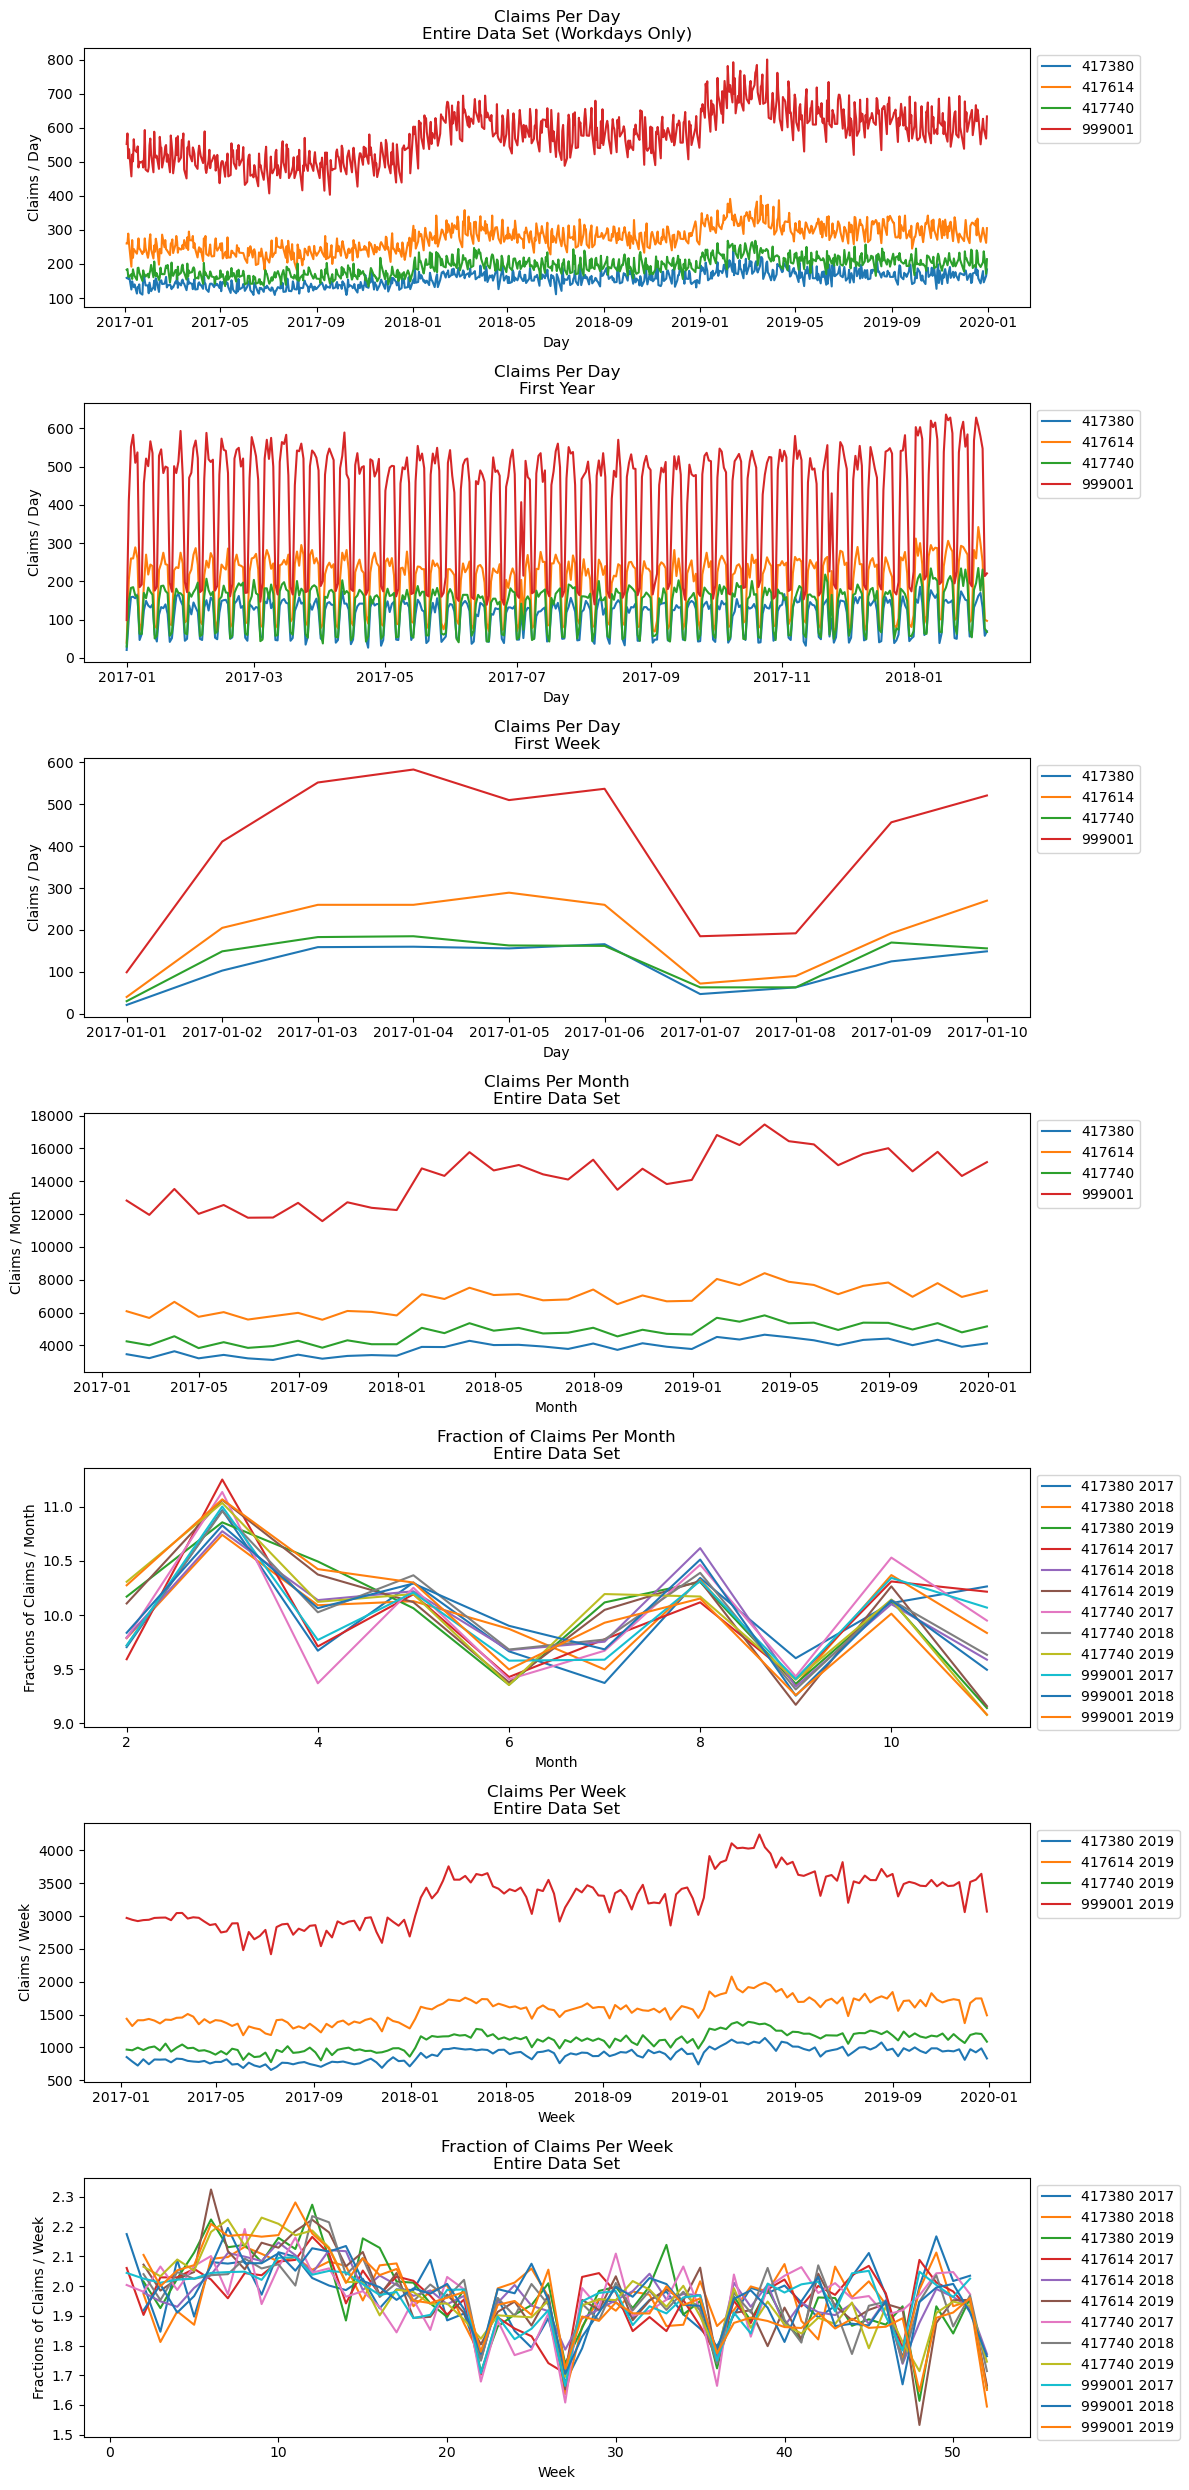

In [5]:
f, axes = plt.subplots(7, 1, figsize=(12, 25), dpi=100)
merged = bridge_df.merge(claims_df, on='dim_claim_id').merge(date_df, on='dim_date_id')

# sort the payer labels so that the legends appear in sorted order
for payer in sorted(merged['bin'].unique()):
    segment = merged.loc[merged['bin'] == payer]
    axes[0].set_title('Claims Per Day\nEntire Data Set (Workdays Only)')
    axes[0].plot(segment.loc[segment['is_workday'] == 1].groupby('date_val')['pharmacy_claim_approved'].count(), label=str(payer))
    axes[0].set_ylabel('Claims / Day')
    axes[0].set_xlabel('Day')

    axes[1].set_title('Claims Per Day\nFirst Year')
    axes[1].plot(segment.groupby('date_val')['pharmacy_claim_approved'].count().iloc[:400], label=str(payer))
    axes[1].set_ylabel('Claims / Day')
    axes[1].set_xlabel('Day')

    axes[2].set_title('Claims Per Day\nFirst Week')
    axes[2].plot(segment.groupby('date_val')['pharmacy_claim_approved'].count().iloc[:10], label=str(payer))
    axes[2].set_ylabel('Claims / Day')
    axes[2].set_xlabel('Day')

    axes[3].set_title('Claims Per Month\nEntire Data Set')
    axes[3].plot(segment.groupby('date_val').count().groupby(pd.Grouper(freq='M'))['pharmacy_claim_approved'].sum(), label=str(payer))
    axes[3].set_ylabel('Claims / Month')
    axes[3].set_xlabel('Month')

    for year, view in segment.groupby('calendar_year'):
        view = view.groupby('date_val').count().groupby(pd.Grouper(freq='M'))['pharmacy_claim_approved'].sum()[1:-1]
        view = view / view.sum() * 100

        axes[4].set_title('Fraction of Claims Per Month\nEntire Data Set')
        axes[4].plot(np.array(view.index.month).astype(int), view.values, label=str(payer) + ' ' + str(year))
        axes[4].set_ylabel('Fractions of Claims / Month')
        axes[4].set_xlabel('Month')

    axes[5].set_title('Claims Per Week\nEntire Data Set')
    # need to truncate the first and last bins because the weeks are incomplete
    axes[5].plot(segment.groupby('date_val').count().groupby(pd.Grouper(freq='W'))['pharmacy_claim_approved'].sum()[1:-1], label=str(payer) + ' ' + str(year))
    axes[5].set_ylabel('Claims / Week')
    axes[5].set_xlabel('Week')

    for year, view in segment.groupby('calendar_year'):
        # need to truncate the first and last bins because the weeks can be incomplete
        view = view.groupby('date_val').count().groupby(pd.Grouper(freq='W'))['pharmacy_claim_approved'].sum()[1:-1]
        view = view / view.sum() * 100

        axes[6].set_title('Fraction of Claims Per Week\nEntire Data Set')
        axes[6].plot(np.array(view.index.isocalendar().week).astype(int), view.values, label=str(payer) + ' ' + str(year))
        axes[6].set_ylabel('Fractions of Claims / Week')
        axes[6].set_xlabel('Week')

for ax in axes:
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## How does claim volume change with time for each payer/drug combination?
- Large range of daily volume due to the very fine-grained splitting of the data.
- This will lead to large variation in approval rate for smaller volume time points.

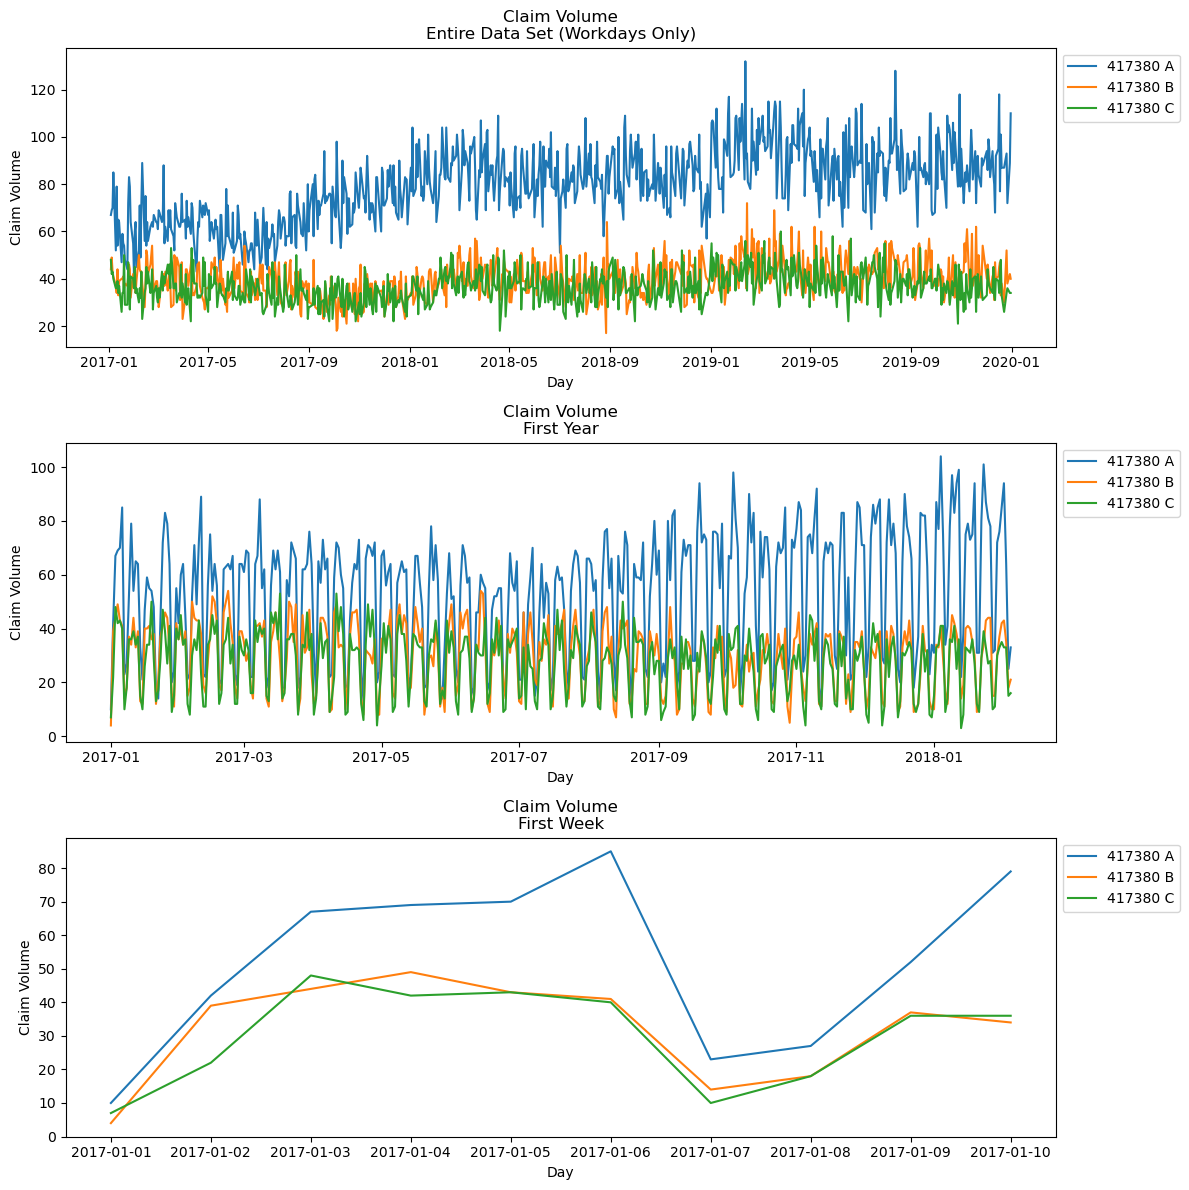

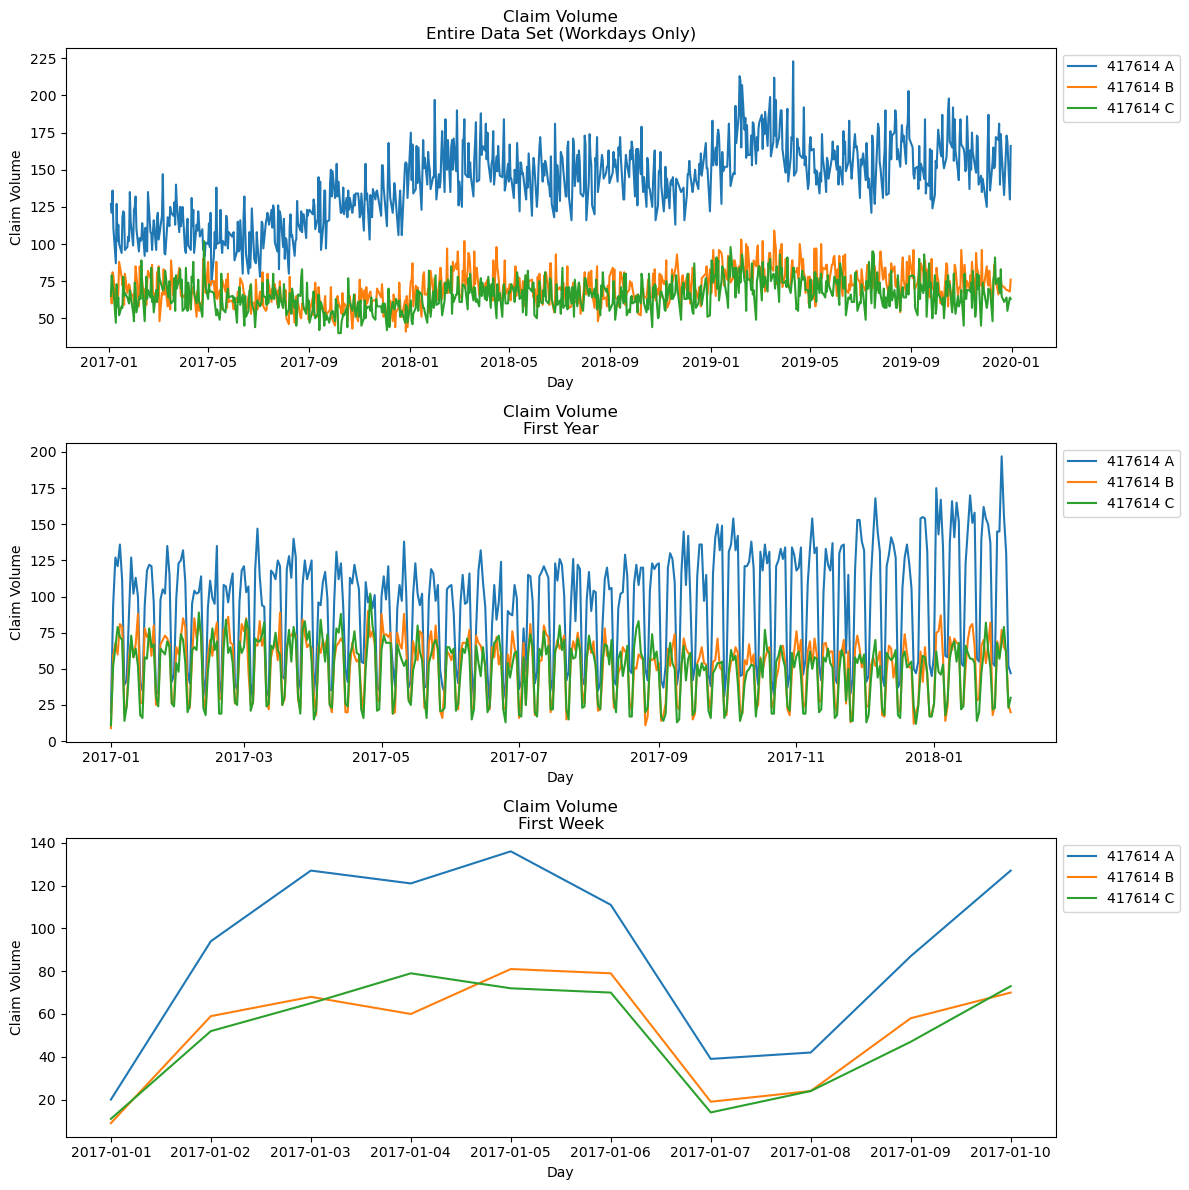

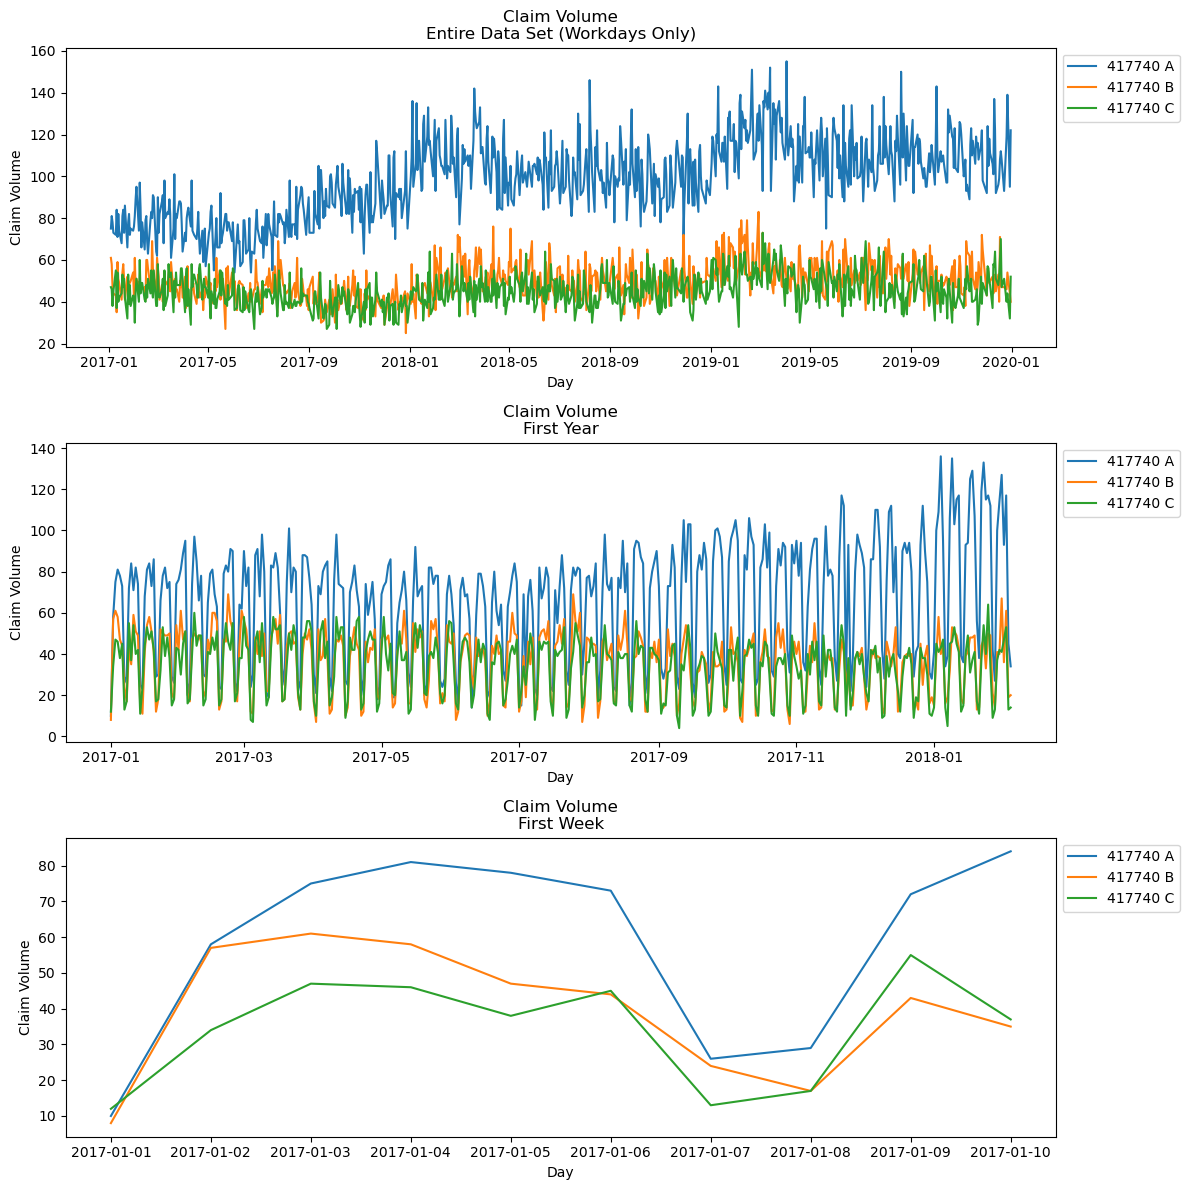

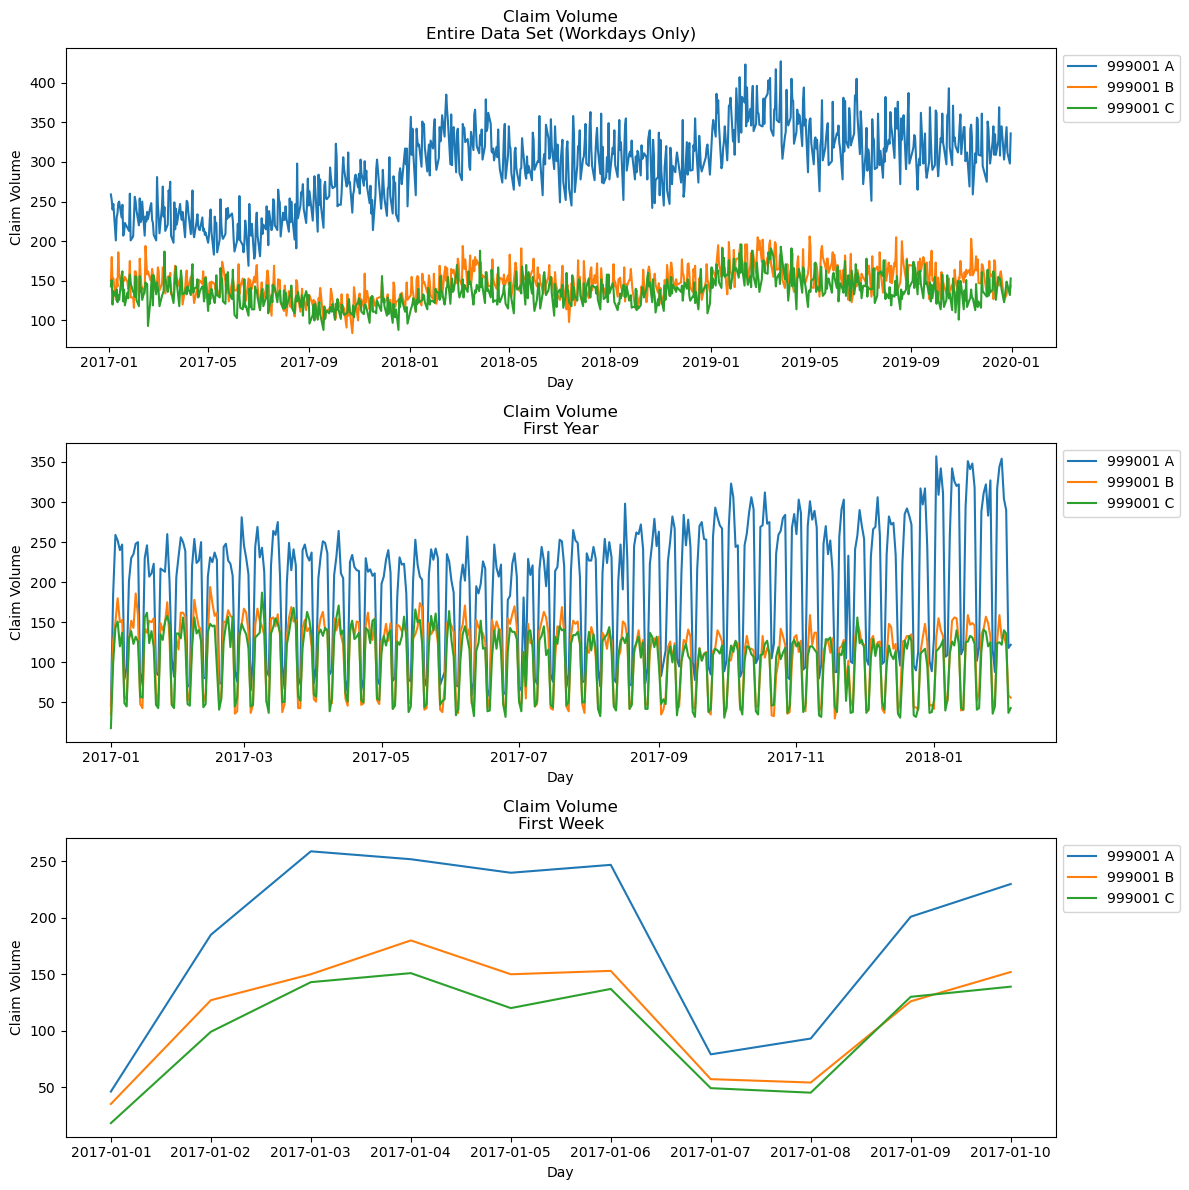

In [6]:
merged = bridge_df.merge(claims_df, on='dim_claim_id').merge(date_df, on='dim_date_id')

# sort the payer labels so that the legends appear in sorted order
for payer in sorted(merged['bin'].unique()):
    f, axes = plt.subplots(3, 1, figsize=(12, 12), dpi=100)
    for drug in merged['drug'].unique():
        segment = merged.loc[(merged['bin'] == payer) & (merged['drug'] == drug)]
        axes[0].set_title('Claim Volume\nEntire Data Set (Workdays Only)')
        axes[0].plot(segment.loc[segment['is_workday'] == 1].groupby('date_val')['pharmacy_claim_approved'].count(), label=str(payer) + ' ' + drug)
        axes[0].set_ylabel('Claim Volume')
        axes[0].set_xlabel('Day')

        axes[1].set_title('Claim Volume\nFirst Year')
        axes[1].plot(segment.groupby('date_val')['pharmacy_claim_approved'].count().iloc[:400], label=str(payer) + ' ' + drug)
        axes[1].set_ylabel('Claim Volume')
        axes[1].set_xlabel('Day')

        axes[2].set_title('Claim Volume\nFirst Week')
        axes[2].plot(segment.groupby('date_val')['pharmacy_claim_approved'].count().iloc[:10], label=str(payer) + ' ' + drug)
        axes[2].set_ylabel('Claim Volume')
        axes[2].set_xlabel('Day')

    for ax in axes:
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# Claim Approval
## How does the total claim approval rate change with time?
- No distinct pattern in the approval rate.

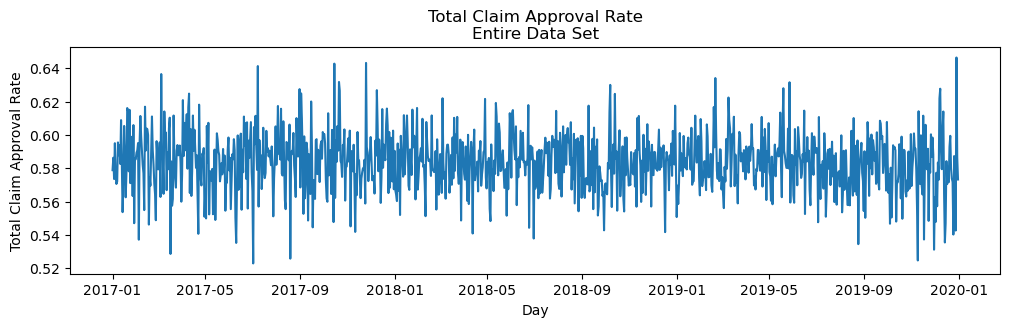

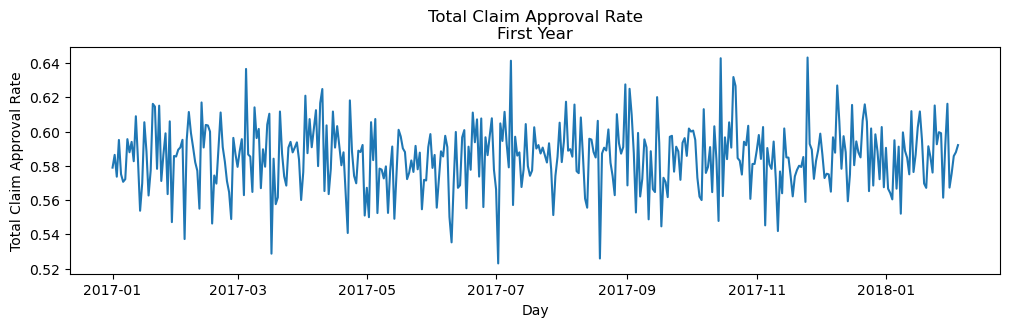

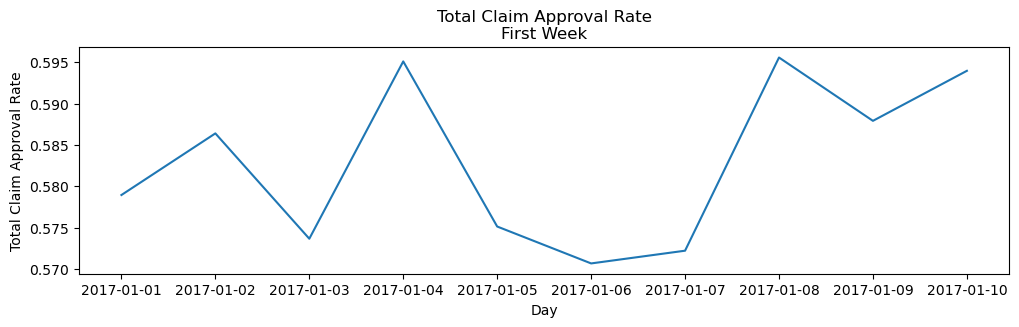

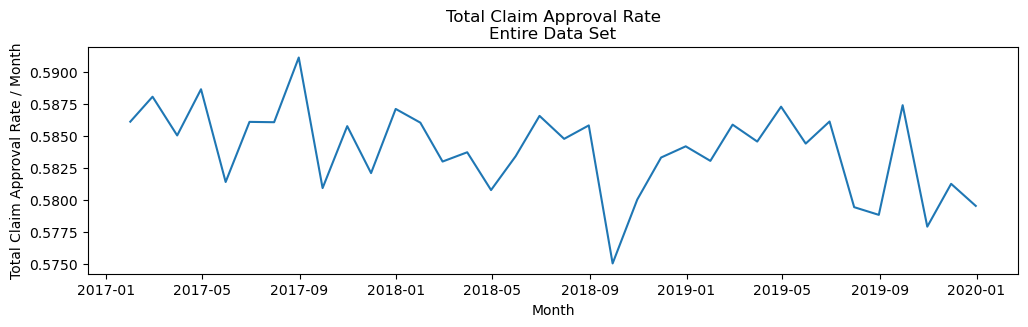

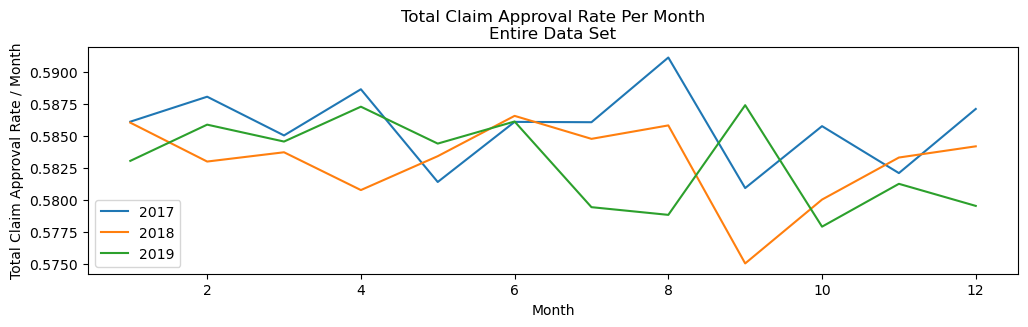

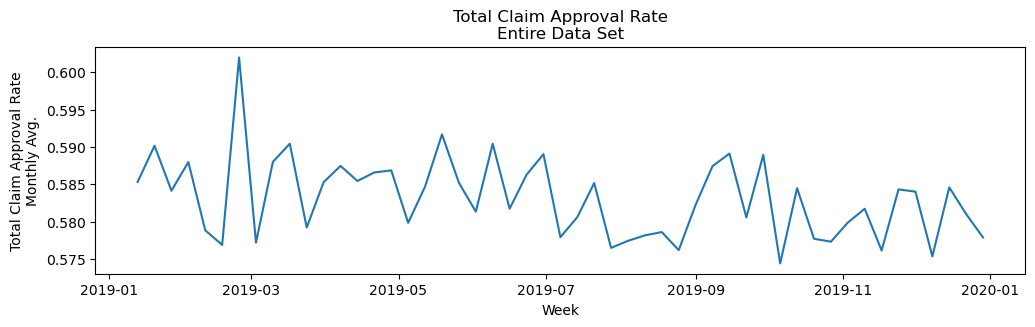

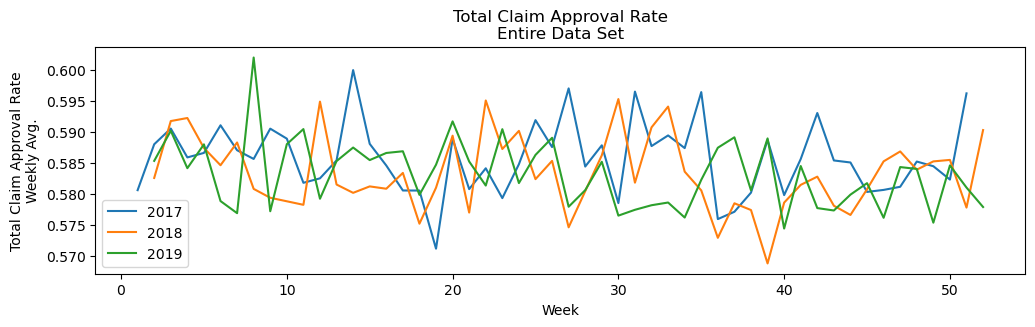

In [7]:
merged = bridge_df.merge(claims_df, on='dim_claim_id').merge(date_df, on='dim_date_id')
f, axes = plt.subplots(1, 1, figsize=(12, 3), dpi=100)
plt.title('Total Claim Approval Rate\nEntire Data Set')
plt.plot(merged.groupby('date_val')['pharmacy_claim_approved'].mean())
plt.ylabel('Total Claim Approval Rate')
plt.xlabel('Day')
plt.show()

f, axes = plt.subplots(1, 1, figsize=(12, 3), dpi=100)
plt.title('Total Claim Approval Rate\nFirst Year')
plt.plot(merged.groupby('date_val')['pharmacy_claim_approved'].mean().iloc[:400])
plt.ylabel('Total Claim Approval Rate')
plt.xlabel('Day')
plt.show()

f, axes = plt.subplots(1, 1, figsize=(12, 3), dpi=100)
plt.title('Total Claim Approval Rate\nFirst Week')
plt.plot(merged.groupby('date_val')['pharmacy_claim_approved'].mean().iloc[:10])
plt.ylabel('Total Claim Approval Rate')
plt.xlabel('Day')
plt.show()

f, axes = plt.subplots(1, 1, figsize=(12, 3), dpi=100)
plt.title('Total Claim Approval Rate\nEntire Data Set')

approved = merged.groupby('date_val').sum().groupby(pd.Grouper(freq='M'))['pharmacy_claim_approved'].sum()
total = merged.groupby('date_val').count().groupby(pd.Grouper(freq='M'))['pharmacy_claim_approved'].sum()

plt.plot(approved / total)
plt.ylabel('Total Claim Approval Rate / Month')
plt.xlabel('Month')
plt.show()

f, axes = plt.subplots(1, 1, figsize=(12, 3), dpi=100)
for year, view in merged.groupby('calendar_year'):

    approved = view.groupby('date_val').sum().groupby(pd.Grouper(freq='M'))['pharmacy_claim_approved'].sum()
    total = view.groupby('date_val').count().groupby(pd.Grouper(freq='M'))['pharmacy_claim_approved'].sum()

    plt.title('Total Claim Approval Rate Per Month\nEntire Data Set')
    plt.plot(np.array(total.index.month).astype(int), approved / total, label=year)
    plt.ylabel('Total Claim Approval Rate / Month')
    plt.xlabel('Month')
plt.legend()
plt.show()

f, axes = plt.subplots(1, 1, figsize=(12, 3), dpi=100)
plt.title('Total Claim Approval Rate\nEntire Data Set')
# need to truncate the first and last bins because the weeks are incomplete

approved = view.groupby('date_val').sum().groupby(pd.Grouper(freq='W'))['pharmacy_claim_approved'].sum()[1:-1]
total = view.groupby('date_val').count().groupby(pd.Grouper(freq='W'))['pharmacy_claim_approved'].sum()[1:-1]

plt.plot(approved / total)
plt.ylabel('Total Claim Approval Rate\nMonthly Avg.')
plt.xlabel('Week')
plt.show()

f, axes = plt.subplots(1, 1, figsize=(12, 3), dpi=100)
for year, view in merged.groupby('calendar_year'):
    # need to truncate the first and last bins because the weeks can be incomplete
    
    approved = view.groupby('date_val').sum().groupby(pd.Grouper(freq='W'))['pharmacy_claim_approved'].sum()[1:-1]
    total = view.groupby('date_val').count().groupby(pd.Grouper(freq='W'))['pharmacy_claim_approved'].sum()[1:-1]

    plt.title('Total Claim Approval Rate\nEntire Data Set')
    plt.plot(np.array(total.index.isocalendar().week).astype(int), approved / total, label=year)
    plt.ylabel('Total Claim Approval Rate\nWeekly Avg.')
    plt.xlabel('Week')
plt.legend()
plt.show()

## How does the claim approval rate change with time for each drug?
- The three drugs have different approval rates, but are each constant with time.

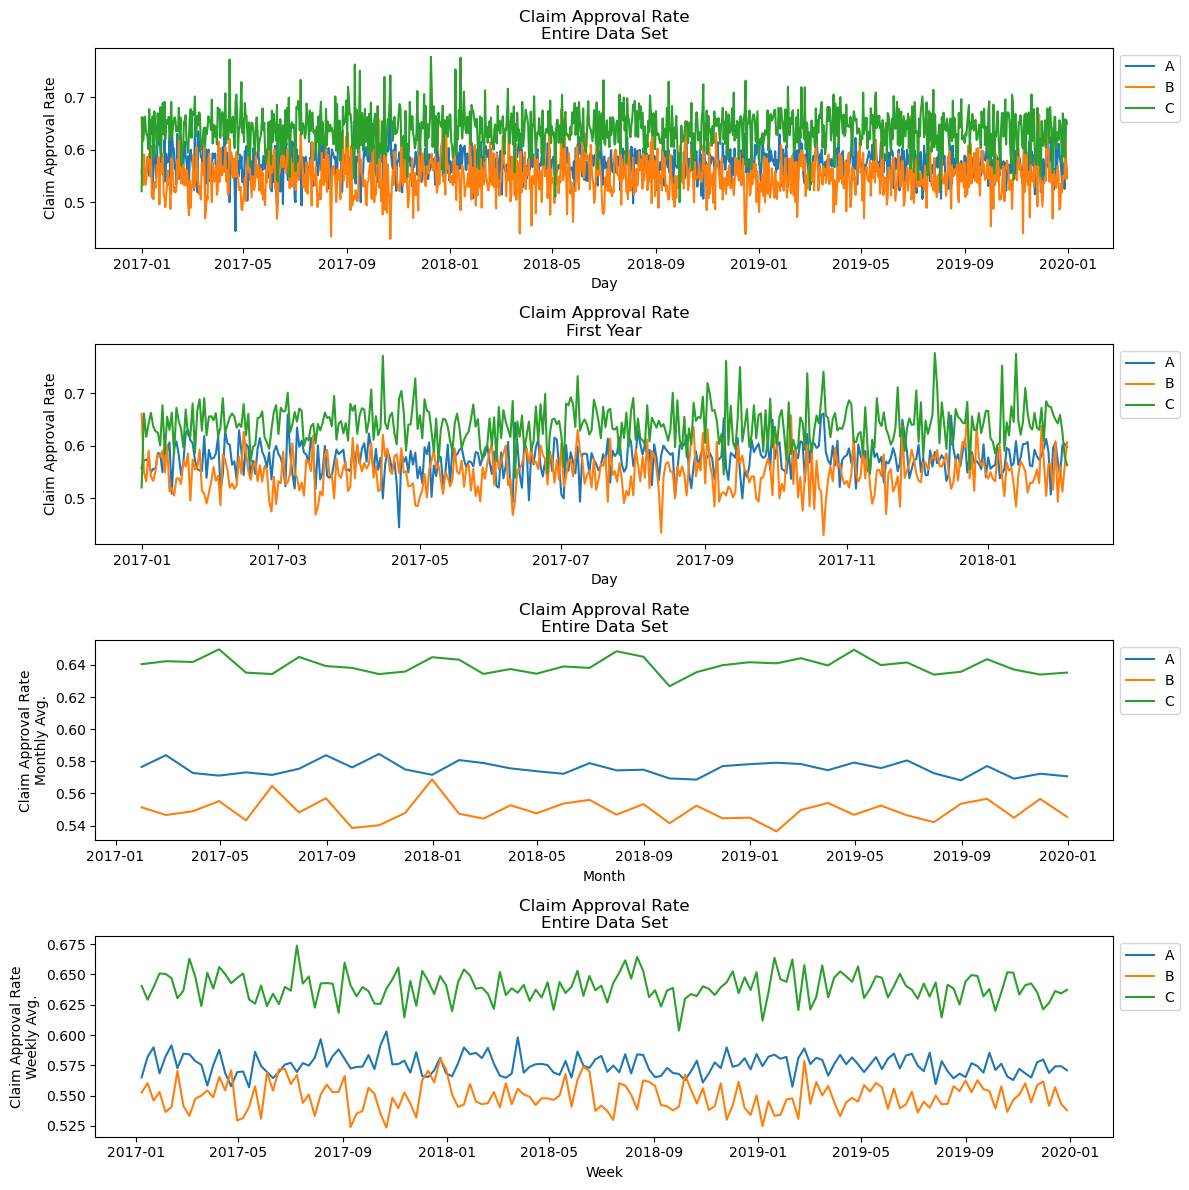

In [8]:
f, axes = plt.subplots(4, 1, figsize=(12, 12), dpi=100)
merged = bridge_df.merge(claims_df, on='dim_claim_id').merge(date_df, on='dim_date_id')

for drug in merged['drug'].unique():
    segment = merged.loc[merged['drug'] == drug]
    axes[0].set_title('Claim Approval Rate\nEntire Data Set')
    axes[0].plot(segment.groupby('date_val')['pharmacy_claim_approved'].mean(), label=drug)
    axes[0].set_ylabel('Claim Approval Rate')
    axes[0].set_xlabel('Day')

    axes[1].set_title('Claim Approval Rate\nFirst Year')
    axes[1].plot(segment.groupby('date_val')['pharmacy_claim_approved'].mean().iloc[:400], label=drug)
    axes[1].set_ylabel('Claim Approval Rate')
    axes[1].set_xlabel('Day')

    approved = segment.groupby('date_val').sum().groupby(pd.Grouper(freq='M'))['pharmacy_claim_approved'].sum()
    total = segment.groupby('date_val').count().groupby(pd.Grouper(freq='M'))['pharmacy_claim_approved'].sum()
    
    axes[2].set_title('Claim Approval Rate\nEntire Data Set')
    axes[2].plot(total.index, approved / total, label=drug)
    axes[2].set_ylabel('Claim Approval Rate\nMonthly Avg.')
    axes[2].set_xlabel('Month')
    
    approved = segment.groupby('date_val').sum().groupby(pd.Grouper(freq='W'))['pharmacy_claim_approved'].sum()[1:-1]
    total = segment.groupby('date_val').count().groupby(pd.Grouper(freq='W'))['pharmacy_claim_approved'].sum()[1:-1]
    
    axes[3].set_title('Claim Approval Rate\nEntire Data Set')
    axes[3].plot(total.index, approved / total, label=drug)
    axes[3].set_ylabel('Claim Approval Rate\nWeekly Avg.')
    axes[3].set_xlabel('Week')

for ax in axes:
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## How does the claim approval rate change with time for each payer?
- 417740 increases claim approval in the middle of 2017.
- 417614 and 417380 decreases claim approval in the middle of 2017.
- 999001 has a constant claim approval with time.
- The next section demonstrates that the change in approval rate for each payer is due to the change in drug volume, and not the rate at which payer approved each drug.

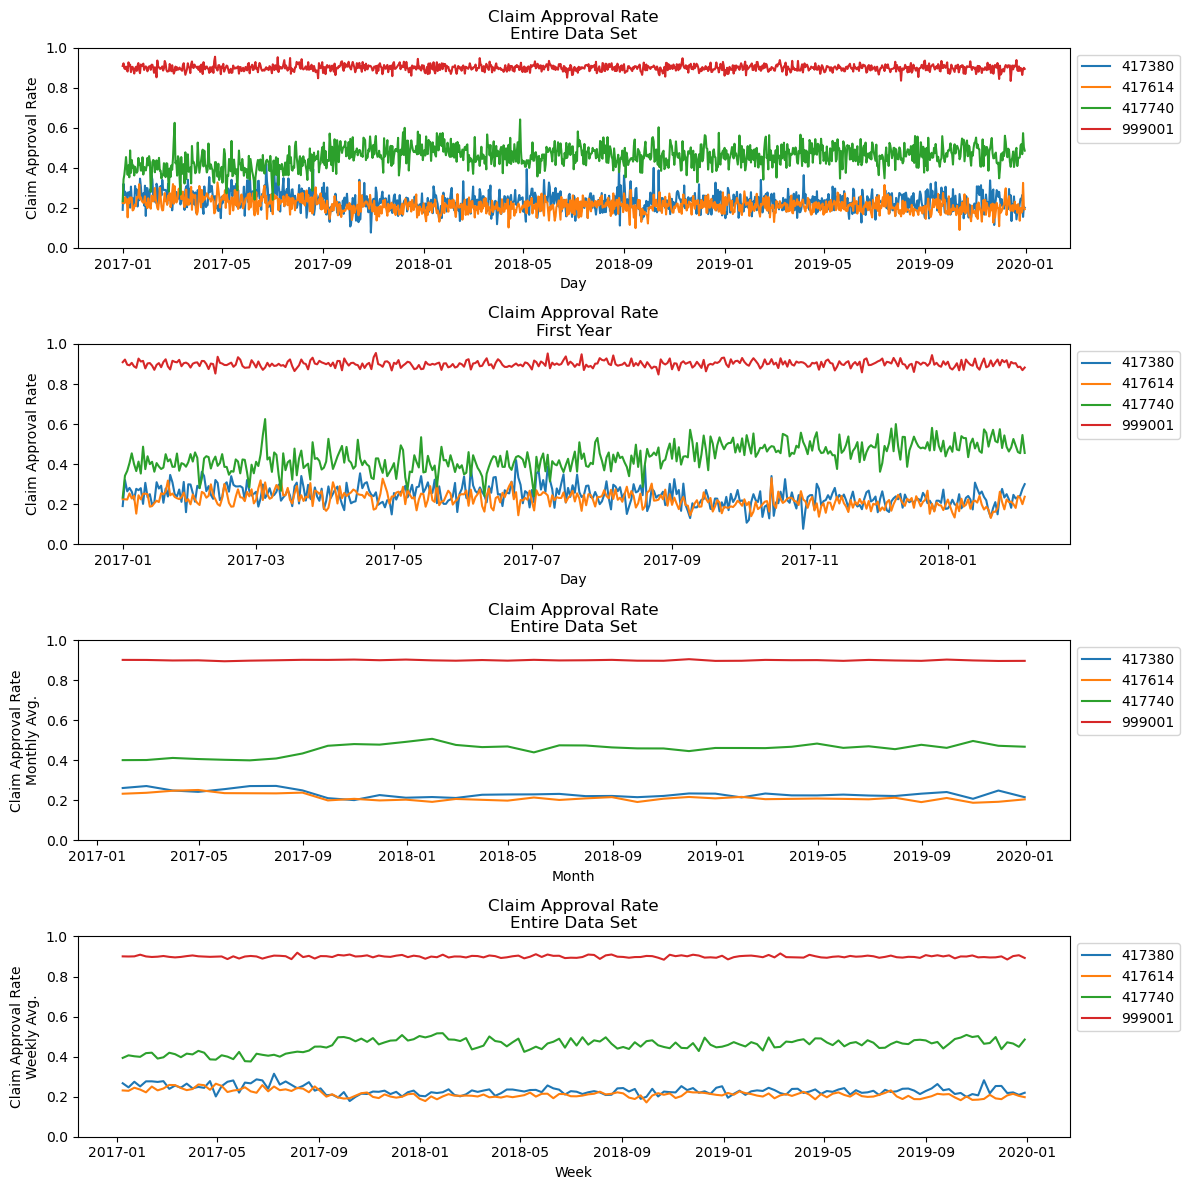

In [9]:
f, axes = plt.subplots(4, 1, figsize=(12, 12), dpi=100)
merged = bridge_df.merge(claims_df, on='dim_claim_id').merge(date_df, on='dim_date_id')

for payer in sorted(merged['bin'].unique()):
    segment = merged.loc[merged['bin'] == payer]
    axes[0].set_title('Claim Approval Rate\nEntire Data Set')
    axes[0].plot(segment.groupby('date_val')['pharmacy_claim_approved'].mean(), label=payer)
    axes[0].set_ylabel('Claim Approval Rate')
    axes[0].set_xlabel('Day')

    axes[1].set_title('Claim Approval Rate\nFirst Year')
    axes[1].plot(segment.groupby('date_val')['pharmacy_claim_approved'].mean().iloc[:400], label=payer)
    axes[1].set_ylabel('Claim Approval Rate')
    axes[1].set_xlabel('Day')

    approved = segment.groupby('date_val').sum().groupby(pd.Grouper(freq='M'))['pharmacy_claim_approved'].sum()
    total = segment.groupby('date_val').count().groupby(pd.Grouper(freq='M'))['pharmacy_claim_approved'].sum()
    
    axes[2].set_title('Claim Approval Rate\nEntire Data Set')
    axes[2].plot(total.index, approved / total, label=payer)
    axes[2].set_ylabel('Claim Approval Rate\nMonthly Avg.')
    axes[2].set_xlabel('Month')
    
    approved = segment.groupby('date_val').sum().groupby(pd.Grouper(freq='W'))['pharmacy_claim_approved'].sum()[1:-1]
    total = segment.groupby('date_val').count().groupby(pd.Grouper(freq='W'))['pharmacy_claim_approved'].sum()[1:-1]
    
    axes[3].set_title('Claim Approval Rate\nEntire Data Set')
    axes[3].plot(total.index, approved / total, label=payer)
    axes[3].set_ylabel('Claim Approval Rate\nWeekly Avg.')
    axes[3].set_xlabel('Week')

for ax in axes:
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()

## How does the claim approval rate change with time for each payer/drug combination?
- Approval rates are for each drug/payer combination are constant with time at either 90% or 0% for each combination.

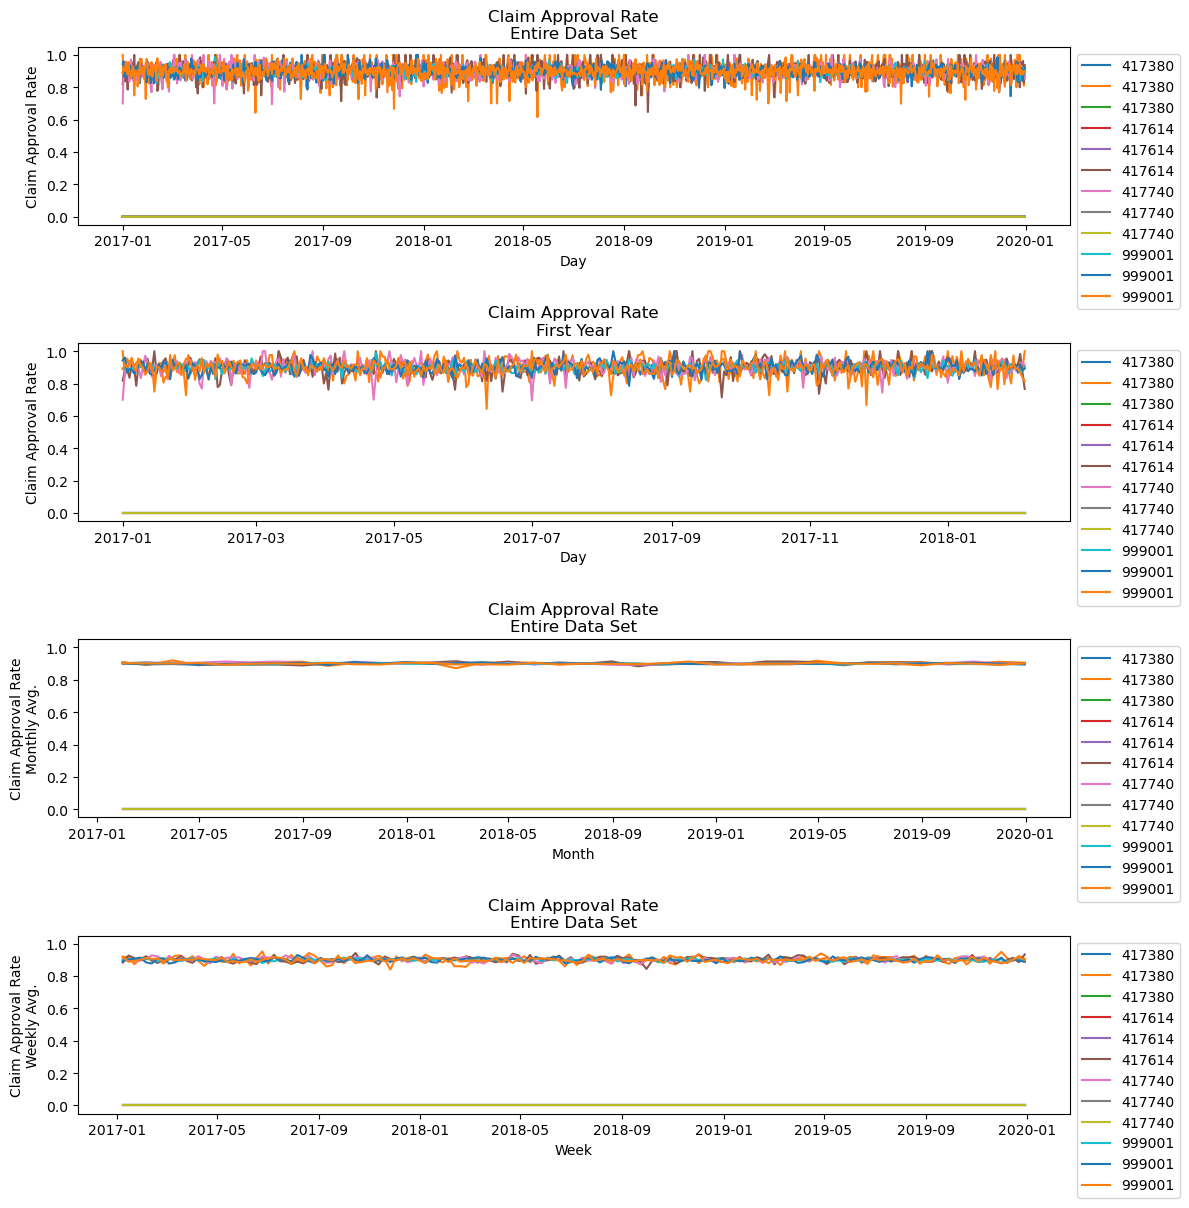

In [10]:
f, axes = plt.subplots(4, 1, figsize=(12, 12), dpi=100)
merged = bridge_df.merge(claims_df, on='dim_claim_id').merge(date_df, on='dim_date_id')

for payer in sorted(merged['bin'].unique()):
    for drug in merged['drug'].unique():
        segment = merged.loc[(merged['bin'] == payer) & (merged['drug'] == drug)]
        axes[0].set_title('Claim Approval Rate\nEntire Data Set')
        axes[0].plot(segment.groupby('date_val')['pharmacy_claim_approved'].mean(), label=payer)
        axes[0].set_ylabel('Claim Approval Rate')
        axes[0].set_xlabel('Day')

        axes[1].set_title('Claim Approval Rate\nFirst Year')
        axes[1].plot(segment.groupby('date_val')['pharmacy_claim_approved'].mean().iloc[:400], label=payer)
        axes[1].set_ylabel('Claim Approval Rate')
        axes[1].set_xlabel('Day')

        approved = segment.groupby('date_val').sum().groupby(pd.Grouper(freq='M'))['pharmacy_claim_approved'].sum()
        total = segment.groupby('date_val').count().groupby(pd.Grouper(freq='M'))['pharmacy_claim_approved'].sum()

        axes[2].set_title('Claim Approval Rate\nEntire Data Set')
        axes[2].plot(total.index, approved / total, label=payer)
        axes[2].set_ylabel('Claim Approval Rate\nMonthly Avg.')
        axes[2].set_xlabel('Month')

        approved = segment.groupby('date_val').sum().groupby(pd.Grouper(freq='W'))['pharmacy_claim_approved'].sum()[1:-1]
        total = segment.groupby('date_val').count().groupby(pd.Grouper(freq='W'))['pharmacy_claim_approved'].sum()[1:-1]

        axes[3].set_title('Claim Approval Rate\nEntire Data Set')
        axes[3].plot(total.index, approved / total, label=payer)
        axes[3].set_ylabel('Claim Approval Rate\nWeekly Avg.')
        axes[3].set_xlabel('Week')

for ax in axes:
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_ylim(-0.05, 1.05)
plt.tight_layout()
plt.show()

## How does the average claim approval rate change with time?
- No significant change in average rate of claim approval with year.

In [11]:
for year, view in merged.groupby('calendar_year'):
    print(f"{round(100 * view['pharmacy_claim_approved'].mean(), 1)}% of claims ({view['pharmacy_claim_approved'].count()} records) are approved in {year}.")

58.6% of claims (308265 records) are approved in 2017.
58.3% of claims (364109 records) are approved in 2018.
58.3% of claims (396086 records) are approved in 2019.


## How does the average claim approval rate change with month (`calendar_month`)?
- No significant change in average rate of claim approval with month.

In [12]:
months = {1: 'January',
          2: 'February',
          3: 'March',
          4: 'April',
          5: 'May',
          6: 'June',
          7: 'July',
          8: 'August',
          9: 'September',
          10: 'October',
          11: 'November',
          12: 'December'}
for month, view in merged.groupby('calendar_month'):
    print(f"{round(100 * view['pharmacy_claim_approved'].mean(), 1)}% of claims ({view['pharmacy_claim_approved'].count()} records) are approved in {months[month]}.")

58.5% of claims (92533 records) are approved in January.
58.6% of claims (88313 records) are approved in February.
58.4% of claims (97622 records) are approved in March.
58.5% of claims (89587 records) are approved in April.
58.3% of claims (91016 records) are approved in May.
58.6% of claims (85270 records) are approved in June.
58.3% of claims (87090 records) are approved in July.
58.5% of claims (91902 records) are approved in August.
58.1% of claims (82974 records) are approved in September.
58.1% of claims (90638 records) are approved in October.
58.2% of claims (85005 records) are approved in November.
58.3% of claims (86510 records) are approved in December.


## How does the average claim approval rate change with day of the week (`day_of_week`)?
- No significant change in average rate of claim approval with day of the week.

In [13]:
days = {1: 'Sunday',
        2: 'Monday',
        3: 'Tuesday',
        4: 'Wednesday',
        5: 'Thursday',
        6: 'Friday',
        7: 'Saturday'}
for day, view in merged.groupby('day_of_week'):
    print(f"{round(100 * view['pharmacy_claim_approved'].mean(), 1)}% of claims ({view['pharmacy_claim_approved'].count()} records) are approved in {days[day]}.")

58.4% of claims (65166 records) are approved in Sunday.
58.4% of claims (171929 records) are approved in Monday.
58.5% of claims (195157 records) are approved in Tuesday.
58.4% of claims (194165 records) are approved in Wednesday.
58.5% of claims (192646 records) are approved in Thursday.
58.2% of claims (184629 records) are approved in Friday.
58.1% of claims (64768 records) are approved in Saturday.


## How does the average claim approval rate change if it is a workday (`is_workday`)?
- No significant change in average rate of claim approval with day of the week.

In [14]:
for workday, view in merged.groupby('is_workday'):
    if workday:
        text = 'on a workday'
    else:
        text = 'on a non-workday'
    print(f"{round(100 * view['pharmacy_claim_approved'].mean(), 1)}% of claims ({view['pharmacy_claim_approved'].count()} records) are approved {text}.")

58.2% of claims (144673 records) are approved on a non-workday.
58.4% of claims (923787 records) are approved on a workday.


## How does the average claim approval rate change if it is a holiday (`is_holiday`)?
- No significant change in average rate of claim approval with day of the week.

In [15]:
for workday, view in merged.groupby('is_holiday'):
    if workday:
        text = 'on a holiday'
    else:
        text = 'on a non-holiday'
    print(f"{round(100 * view['pharmacy_claim_approved'].mean(), 1)}% of claims ({view['pharmacy_claim_approved'].count()} records) are approved {text}.")

58.4% of claims (1059667 records) are approved on a non-holiday.
58.1% of claims (8793 records) are approved on a holiday.


## How does the combination of payer (`bin`), and reject code (`reject_code`) influence the average rate of claim approval, with respect to time?
- No significant change in average rate of claim approval for any of the combinations.

In [16]:
time_names = ['calendar_year', 'is_workday', 'is_holiday']

for time_name in time_names:
    split = pd.DataFrame(merged.groupby(['bin', 'drug', time_name])['pharmacy_claim_approved'].mean())
    split.loc[:, 'pharmacy_claim_approved_count'] = merged.groupby(['bin', 'drug', time_name])['pharmacy_claim_approved'].count()
    split = split.rename(columns={'pharmacy_claim_approved': 'pharmacy_claim_approved_percent'})
    display(split.loc[split['pharmacy_claim_approved_percent'] > 0].sort_index(level=[0, 1, 2]))

pharmacy_claim_approved_percent  \
bin    drug calendar_year                                    
417380 B    2017                                  0.902617   
            2018                                  0.899235   
            2019                                  0.903088   
417614 C    2017                                  0.898416   
            2018                                  0.903825   
            2019                                  0.902964   
417740 A    2017                                  0.904993   
            2018                                  0.898130   
            2019                                  0.900807   
999001 A    2017                                  0.901281   
            2018                                  0.899656   
            2019                                  0.898785   
       B    2017                                  0.899677   
            2018                                  0.900537   
            2019                                  0.900211   
       C    2017                                  0.899854   
            2018                                  0.899242   
            2019                                  0.899256   

                           pharmacy_claim_approved_count  
bin    drug calendar_year                                 
417380 B    2017                                   10813  
            2018                                   11889  
            2019                                   12919  
417614 C    2017                                   17995  
            2018                                   19059  
            2019                                   20714  
417740 A    2017                                   23535  
            2018                                   30431  
            2019                                   33208  
999001 A    2017                                   70584  
            2018                                   91117  
            2019                                   98483  
       B    2017                                   39921  
            2018                                   43735  
            2019                                   47961  
       C    2017                                   37555  
            2018                                   39709  
            2019                                   43298

pharmacy_claim_approved_percent  \
bin    drug is_workday                                    
417380 B    0                                  0.903030   
            1                                  0.901438   
417614 C    0                                  0.907013   
            1                                  0.901035   
417740 A    0                                  0.898065   
            1                                  0.901455   
999001 A    0                                  0.898601   
            1                                  0.899950   
       B    0                                  0.898429   
            1                                  0.900431   
       C    0                                  0.894296   
            1                                  0.900238   

                        pharmacy_claim_approved_count  
bin    drug is_workday                                 
417380 B    0                                    4950  
            1                                   30671  
417614 C    0                                    7700  
            1                                   50068  
417740 A    0                                   11625  
            1                                   75549  
999001 A    0                                   35237  
            1                                  224947  
       B    0                                   18017  
            1                                  113600  
       C    0                                   16234  
            1                                  104328

pharmacy_claim_approved_percent  \
bin    drug is_holiday                                    
417380 B    0                                  0.901460   
            1                                  0.927273   
417614 C    0                                  0.901813   
            1                                  0.904232   
417740 A    0                                  0.901152   
            1                                  0.882521   
999001 A    0                                  0.899823   
            1                                  0.892959   
       B    0                                  0.900261   
            1                                  0.888405   
       C    0                                  0.899487   
            1                                  0.893780   

                        pharmacy_claim_approved_count  
bin    drug is_holiday                                 
417380 B    0                                   35346  
            1                                     275  
417614 C    0                                   57319  
            1                                     449  
417740 A    0                                   86476  
            1                                     698  
999001 A    0                                  258082  
            1                                    2102  
       B    0                                  130470  
            1                                    1147  
       C    0                                  119517  
            1                                    1045

## How does the combination of payer (`bin`), and reject code (`reject_code`) influence the average rate of claim approval, with respect to time?
- No significant change in average rate of claim approval for any of the combinations.

In [17]:
for payer in np.sort(merged['bin'].unique()):
    for drug in merged['drug'].unique():
        split = merged.loc[(merged['bin'] == payer) & (merged['drug'] == drug)]
        split = pd.DataFrame(split.groupby(['calendar_year', 'calendar_month'])['pharmacy_claim_approved'].mean())
        split.loc[:, 'pharmacy_claim_approved_count'] = merged.groupby(['calendar_year', 'calendar_month'])['pharmacy_claim_approved'].count()
        split = split.rename(columns={'pharmacy_claim_approved': 'pharmacy_claim_approved_percent'})
        split = split.loc[split['pharmacy_claim_approved_percent'] > 0]
        if len(split) > 0:
            print(f'Segment with payer {payer} and drug {drug}')
            display(split.sort_index(level=[0, 1]))

Segment with payer 417380 and drug B


pharmacy_claim_approved_percent  \
calendar_year calendar_month                                    
2017          1                                      0.908726   
              2                                      0.891039   
              3                                      0.919959   
              4                                      0.889269   
              5                                      0.902163   
              6                                      0.897938   
              7                                      0.909774   
              8                                      0.911796   
              9                                      0.885526   
              10                                     0.903743   
              11                                     0.903981   
              12                                     0.903266   
2018          1                                      0.903949   
              2                                      0.871444   
              3                                      0.905380   
              4                                      0.908465   
              5                                      0.904483   
              6                                      0.894325   
              7                                      0.901940   
              8                                      0.901381   
              9                                      0.900447   
              10                                     0.892996   
              11                                     0.900098   
              12                                     0.904713   
2019          1                                      0.894834   
              2                                      0.894046   
              3                                      0.895637   
              4                                      0.917423   
              5                                      0.901370   
              6                                      0.904427   
              7                                      0.909263   
              8                                      0.909974   
              9                                      0.896488   
              10                                     0.897614   
              11                                     0.911298   
              12                                     0.905392   

                              pharmacy_claim_approved_count  
calendar_year calendar_month                                 
2017          1                                       26606  
              2                                       24843  
              3                                       28376  
              4                                       24793  
              5                                       26188  
              6                                       24404  
              7                                       24632  
              8                                       26376  
              9                                       24173  
              10                                      26475  
              11                                      25894  
              12                                      25505  
2018          1                                       30872  
              2                                       29794  
              3                                       32911  
              4                                       30638  
              5                                       31209  
              6                                       29823  
              7                                       29456  
              8                                       31899  
              9                                       28261  
              10                                      30884  
              11                                      29130  
         

Segment with payer 417614 and drug C


pharmacy_claim_approved_percent  \
calendar_year calendar_month                                    
2017          1                                      0.905552   
              2                                      0.897010   
              3                                      0.904710   
              4                                      0.895421   
              5                                      0.893911   
              6                                      0.893270   
              7                                      0.894079   
              8                                      0.888682   
              9                                      0.898949   
              10                                     0.905647   
              11                                     0.900075   
              12                                     0.904726   
2018          1                                      0.906808   
              2                                      0.914674   
              3                                      0.894953   
              4                                      0.912395   
              5                                      0.895662   
              6                                      0.906977   
              7                                      0.899308   
              8                                      0.913341   
              9                                      0.883475   
              10                                     0.899571   
              11                                     0.908068   
              12                                     0.909794   
2019          1                                      0.897488   
              2                                      0.912868   
              3                                      0.913134   
              4                                      0.908540   
              5                                      0.889571   
              6                                      0.907568   
              7                                      0.906407   
              8                                      0.904704   
              9                                      0.895694   
              10                                     0.901659   
              11                                     0.893546   
              12                                     0.902819   

                              pharmacy_claim_approved_count  
calendar_year calendar_month                                 
2017          1                                       26606  
              2                                       24843  
              3                                       28376  
              4                                       24793  
              5                                       26188  
              6                                       24404  
              7                                       24632  
              8                                       26376  
              9                                       24173  
              10                                      26475  
              11                                      25894  
              12                                      25505  
2018          1                                       30872  
              2                                       29794  
              3                                       32911  
              4                                       30638  
              5                                       31209  
              6                                       29823  
              7                                       29456  
              8                                       31899  
              9                                       28261  
              10                                      30884  
              11                                      29130  
         

Segment with payer 417740 and drug A


pharmacy_claim_approved_percent  \
calendar_year calendar_month                                    
2017          1                                      0.901058   
              2                                      0.907962   
              3                                      0.902404   
              4                                      0.905814   
              5                                      0.912480   
              6                                      0.907429   
              7                                      0.912627   
              8                                      0.903304   
              9                                      0.894995   
              10                                     0.911609   
              11                                     0.904320   
              12                                     0.898206   
2018          1                                      0.901507   
              2                                      0.904838   
              3                                      0.892947   
              4                                      0.904368   
              5                                      0.895054   
              6                                      0.900521   
              7                                      0.900517   
              8                                      0.892465   
              9                                      0.890878   
              10                                     0.894571   
              11                                     0.901978   
              12                                     0.898121   
2019          1                                      0.901651   
              2                                      0.900610   
              3                                      0.896450   
              4                                      0.899166   
              5                                      0.897908   
              6                                      0.903891   
              7                                      0.900881   
              8                                      0.898774   
              9                                      0.899334   
              10                                     0.912864   
              11                                     0.900994   
              12                                     0.897064   

                              pharmacy_claim_approved_count  
calendar_year calendar_month                                 
2017          1                                       26606  
              2                                       24843  
              3                                       28376  
              4                                       24793  
              5                                       26188  
              6                                       24404  
              7                                       24632  
              8                                       26376  
              9                                       24173  
              10                                      26475  
              11                                      25894  
              12                                      25505  
2018          1                                       30872  
              2                                       29794  
              3                                       32911  
              4                                       30638  
              5                                       31209  
              6                                       29823  
              7                                       29456  
              8                                       31899  
              9                                       28261  
              10                                      30884  
              11                                      29130  
         

Segment with payer 999001 and drug A


pharmacy_claim_approved_percent  \
calendar_year calendar_month                                    
2017          1                                      0.902804   
              2                                      0.905571   
              3                                      0.899259   
              4                                      0.901864   
              5                                      0.896040   
              6                                      0.895768   
              7                                      0.897212   
              8                                      0.902870   
              9                                      0.905282   
              10                                     0.904060   
              11                                     0.903715   
              12                                     0.899356   
2018          1                                      0.898689   
              2                                      0.896661   
              3                                      0.899493   
              4                                      0.900181   
              5                                      0.899266   
              6                                      0.900264   
              7                                      0.900218   
              8                                      0.902682   
              9                                      0.900503   
              10                                     0.893979   
              11                                     0.906061   
              12                                     0.898418   
2019          1                                      0.898749   
              2                                      0.900932   
              3                                      0.900411   
              4                                      0.899261   
              5                                      0.893677   
              6                                      0.901470   
              7                                      0.900152   
              8                                      0.899500   
              9                                      0.902345   
              10                                     0.896660   
              11                                     0.896090   
              12                                     0.896244   

                              pharmacy_claim_approved_count  
calendar_year calendar_month                                 
2017          1                                       26606  
              2                                       24843  
              3                                       28376  
              4                                       24793  
              5                                       26188  
              6                                       24404  
              7                                       24632  
              8                                       26376  
              9                                       24173  
              10                                      26475  
              11                                      25894  
              12                                      25505  
2018          1                                       30872  
              2                                       29794  
              3                                       32911  
              4                                       30638  
              5                                       31209  
              6                                       29823  
              7                                       29456  
              8                                       31899  
              9                                       28261  
              10                                      30884  
              11                                      29130  
         

Segment with payer 999001 and drug B


pharmacy_claim_approved_percent  \
calendar_year calendar_month                                    
2017          1                                      0.899675   
              2                                      0.895467   
              3                                      0.897110   
              4                                      0.892362   
              5                                      0.895798   
              6                                      0.900780   
              7                                      0.902350   
              8                                      0.905125   
              9                                      0.891528   
              10                                     0.909310   
              11                                     0.898537   
              12                                     0.909960   
2018          1                                      0.898539   
              2                                      0.903134   
              3                                      0.908557   
              4                                      0.897646   
              5                                      0.904592   
              6                                      0.900813   
              7                                      0.899854   
              8                                      0.903439   
              9                                      0.893876   
              10                                     0.900790   
              11                                     0.897302   
              12                                     0.895892   
2019          1                                      0.895121   
              2                                      0.904129   
              3                                      0.901001   
              4                                      0.898392   
              5                                      0.900000   
              6                                      0.905477   
              7                                      0.895522   
              8                                      0.898968   
              9                                      0.905070   
              10                                     0.904699   
              11                                     0.900339   
              12                                     0.894466   

                              pharmacy_claim_approved_count  
calendar_year calendar_month                                 
2017          1                                       26606  
              2                                       24843  
              3                                       28376  
              4                                       24793  
              5                                       26188  
              6                                       24404  
              7                                       24632  
              8                                       26376  
              9                                       24173  
              10                                      26475  
              11                                      25894  
              12                                      25505  
2018          1                                       30872  
              2                                       29794  
              3                                       32911  
              4                                       30638  
              5                                       31209  
              6                                       29823  
              7                                       29456  
              8                                       31899  
              9                                       28261  
              10                                      30884  
              11                                      29130  
         

Segment with payer 999001 and drug C


pharmacy_claim_approved_percent  \
calendar_year calendar_month                                    
2017          1                                      0.902532   
              2                                      0.901535   
              3                                      0.900163   
              4                                      0.903743   
              5                                      0.892588   
              6                                      0.898640   
              7                                      0.902042   
              8                                      0.897871   
              9                                      0.904434   
              10                                     0.895862   
              11                                     0.893961   
              12                                     0.905856   
2018          1                                      0.902990   
              2                                      0.894524   
              3                                      0.896313   
              4                                      0.893382   
              5                                      0.905281   
              6                                      0.894656   
              7                                      0.899578   
              8                                      0.898608   
              9                                      0.896051   
              10                                     0.901828   
              11                                     0.912909   
              12                                     0.894243   
2019          1                                      0.897143   
              2                                      0.901081   
              3                                      0.899288   
              4                                      0.906777   
              5                                      0.900993   
              6                                      0.898483   
              7                                      0.900027   
              8                                      0.888986   
              9                                      0.903753   
              10                                     0.899295   
              11                                     0.892526   
              12                                     0.901164   

                              pharmacy_claim_approved_count  
calendar_year calendar_month                                 
2017          1                                       26606  
              2                                       24843  
              3                                       28376  
              4                                       24793  
              5                                       26188  
              6                                       24404  
              7                                       24632  
              8                                       26376  
              9                                       24173  
              10                                      26475  
              11                                      25894  
              12                                      25505  
2018          1                                       30872  
              2                                       29794  
              3                                       32911  
              4                                       30638  
              5                                       31209  
              6                                       29823  
              7                                       29456  
              8                                       31899  
              9                                       28261  
              10                                      30884  
              11                                      29130  
         